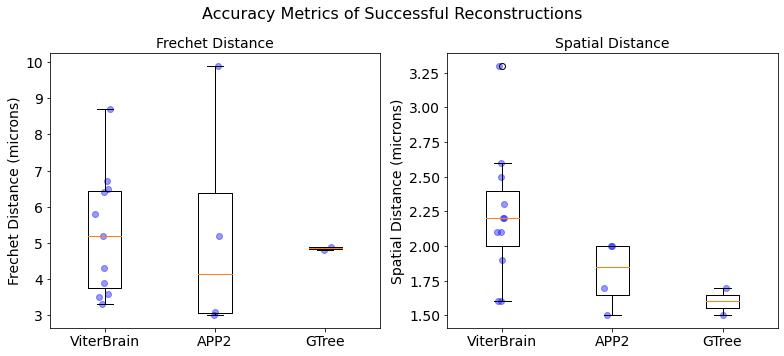

In [14]:
import matplotlib.pyplot as plt
import numpy as np 
#viterbrain, app2, gtree
data_frechet = [[6.5,4.3,3.6,3.3,3.5,3.9,5.8,6.4, 6.7, 5.2, 8.7], [5.2,9.9,3.1,3.0], [4.8, 4.9]]
data_sd = [[1.6,2.6,3.3,1.6,2.5,1.9,2.3,2.2, 2.2, 2.1, 2.1], [1.7,2.0,2.0,1.5], [1.5,1.7]]

fig, axes = plt.subplots(1,2)
axes[0].set_title('Frechet Distance', fontsize=14)
axes[0].set_ylabel("Frechet Distance (microns)", fontsize=14)
axes[0].boxplot(data_frechet, labels=["ViterBrain", "APP2", "GTree"])
for i in range(3):
    y = data_frechet[i]
    x = np.ones(len(y)) + np.random.normal(i, 0.04, size = len(y))
    axes[0].scatter(x,y, c='b', alpha=0.4)
axes[0].set_xticklabels(["ViterBrain", "APP2", "GTree"], fontsize= 14)


axes[1].set_title('Spatial Distance', fontsize=14)
axes[1].set_ylabel("Spatial Distance (microns)", fontsize=14)
axes[1].boxplot(data_sd, labels=["ViterBrain", "APP2", "GTree"])
for i in range(3):
    y = data_sd[i]
    x = np.ones(len(y)) + np.random.normal(i, 0.04, size = len(y))
    axes[1].scatter(x,y, c='b', alpha=0.4)
axes[1].set_xticklabels(["ViterBrain", "APP2", "GTree"], fontsize= 14)

plt.sca(axes[0])
plt.yticks(fontsize=14)

plt.sca(axes[1])
plt.yticks(fontsize=14)

fig.set_size_inches(11, 5)
fig.suptitle("Accuracy Metrics of Successful Reconstructions", fontsize=16)
fig.tight_layout()

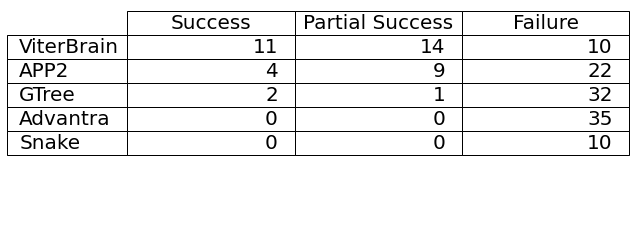

In [3]:
data = [[11, 14, 10],[4,9,22],[2, 1,32], [0, 0, 35], [0, 0, 10]]

for list in data:
    if np.sum(list) not in [10, 35]:
        raise ValueError(f"Only {np.sum(list)} evaluations, not 35")

fig, ax = plt.subplots() 
#ax.set_axis_off() 
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=data,
        rowLabels=["ViterBrain", "APP2", "GTree", "Advantra", "Snake"],
        colLabels=["Success", "Partial Success", "Failure"],
        loc ='upper left')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(1.5,2)

In [10]:
from statsmodels.stats.proportion import proportions_ztest

print("P values for 2 Proportion Z Tests")
print(f"Viterbrain vs App2: {proportions_ztest(count=[data[0][0], data[1][0]], nobs=[35, 35])[1]}")
print(f"Viterbrain vs Snake: {proportions_ztest(count=[data[0][0], data[4][0]], nobs=[35, 10])[1]}")
print(f"APP2 vs Advantra: {proportions_ztest(count=[data[1][0], data[3][0]], nobs=[35, 35])[1]}")
print(f"APP2 vs GTree: {proportions_ztest(count=[data[1][0], data[2][0]], nobs=[35, 35])[1]}")
print(f"APP2 vs Snake: {proportions_ztest(count=[data[1][0], data[4][0]], nobs=[35, 10])[1]}")

P values for 2 Proportion Z Tests
Viterbrain vs App2: 0.041448687457663176
Viterbrain vs Snake: 0.041397618661288514
APP2 vs Advantra: 0.039425832629443
APP2 vs GTree: 0.393153437674003
APP2 vs Snake: 0.26272224684071965
